## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


## Ruta

In [2]:
ruta_in = 'C:/Users/llore/R/Proyectos/Sunat/OSCE/'
ruta_out = 'C:/Users/llore/R/Proyectos/Sunat/out/'

## Convocatorias

In [3]:
convocatorias_2019 = pd.read_excel(ruta_in + '1. CONOSCE_CONVOCATORIAS2019_0.xlsx')
convocatorias_2020 = pd.read_excel(ruta_in + '1. CONOSCE_CONVOCATORIAS2020_0703.xlsx')
convocatorias_2021 = pd.read_excel(ruta_in + '1. CONOSCE_CONVOCATORIAS2021_0.xlsx')
convocatorias_2022 = pd.read_excel(ruta_in + '1. CONOSCE_CONVOCATORIAS2022_0.xlsx')
convocatorias_2023 = pd.read_excel(ruta_in + '1. CONOSCE_CONVOCATORIAS2023_0.xlsx')

In [4]:
convocatorias_2019.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA'], dtype=object)

In [5]:
convocatorias_2020.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA'], dtype=object)

In [6]:
convocatorias_2021.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA'], dtype=object)

In [7]:
convocatorias_2022.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA'], dtype=object)

In [8]:
convocatorias_2023.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA'], dtype=object)

In [9]:
convocatorias = pd.concat([convocatorias_2019, convocatorias_2020, convocatorias_2021, convocatorias_2022, convocatorias_2023])
del([convocatorias_2019, convocatorias_2020, convocatorias_2021, convocatorias_2022, convocatorias_2023])

In [10]:
convocatorias.shape

(306491, 28)

In [11]:
condicion_pre_pandemia = (convocatorias['FECHA_CONVOCATORIA'] >= pd.Timestamp(2019, 1, 1)) & (convocatorias['FECHA_CONVOCATORIA'] < pd.Timestamp(2020, 3, 15))
condicion_pandemia = (convocatorias['FECHA_CONVOCATORIA'] >= pd.Timestamp(2020, 3, 16)) & (convocatorias['FECHA_CONVOCATORIA'] < pd.Timestamp(2022, 10, 28))
condicion_post_pandemia = (convocatorias['FECHA_CONVOCATORIA'] >= pd.Timestamp(2022, 10, 29))

convocatorias['FASE_PANDEMIA'] = np.where(condicion_pre_pandemia, 'pre_pandemia', 
                                    np.where(condicion_pandemia, 'pandemia', 'post_pandemia'))

In [12]:
convocatorias.shape

(306491, 29)

### Manejo de valores nulos

In [13]:
valores_nulos_por_variable = convocatorias.isnull().sum()
print(valores_nulos_por_variable)

CODIGOENTIDAD                     0
ENTIDAD_RUC                       0
ENTIDAD                           0
TIPOENTIDAD                       0
CODIGOCONVOCATORIA                0
DESCRIPCION_PROCESO               0
PROCESO                           0
TIPO_COMPRA                       0
OBJETOCONTRACTUAL                 0
SECTOR                            0
SISTEMA_CONTRATACION             42
TIPOPROCESOSELECCION              0
MONTOREFERENCIAL                  0
N_ITEM                            0
DESCRIPCION_ITEM                  0
UNIDAD_MEDIDA                     2
ESTADOITEM                        0
PAQUETE                           0
CODIGOITEM                    44642
ITEMCUBSO                     44642
DISTRITO_ITEM                  1599
PROVINCIA_ITEM                 1599
DEPARTAMENTO_ITEM              1599
MONTO_REFERENCIAL_ITEM            0
MONEDA                            0
FECHA_CONVOCATORIA                0
FECHAINTEGRACIONBASES             0
FECHAPRESENTACIONPROPUESTA  

In [14]:
total_valores_nulos = valores_nulos_por_variable.sum()
print("Total de valores nulos en el DataFrame:", total_valores_nulos)

Total de valores nulos en el DataFrame: 94125


In [15]:
columnas_numericas = convocatorias.select_dtypes(include=['int64', 'float64']).columns
convocatorias[columnas_numericas] = convocatorias[columnas_numericas].fillna(0).astype(int)

In [16]:
valores_nulos_por_variable_ = convocatorias.isnull().sum()
print(valores_nulos_por_variable_)

CODIGOENTIDAD                     0
ENTIDAD_RUC                       0
ENTIDAD                           0
TIPOENTIDAD                       0
CODIGOCONVOCATORIA                0
DESCRIPCION_PROCESO               0
PROCESO                           0
TIPO_COMPRA                       0
OBJETOCONTRACTUAL                 0
SECTOR                            0
SISTEMA_CONTRATACION             42
TIPOPROCESOSELECCION              0
MONTOREFERENCIAL                  0
N_ITEM                            0
DESCRIPCION_ITEM                  0
UNIDAD_MEDIDA                     2
ESTADOITEM                        0
PAQUETE                           0
CODIGOITEM                        0
ITEMCUBSO                     44642
DISTRITO_ITEM                  1599
PROVINCIA_ITEM                 1599
DEPARTAMENTO_ITEM              1599
MONTO_REFERENCIAL_ITEM            0
MONEDA                            0
FECHA_CONVOCATORIA                0
FECHAINTEGRACIONBASES             0
FECHAPRESENTACIONPROPUESTA  

In [17]:
total_valores_nulos_ = valores_nulos_por_variable_.sum()
print("Total de valores nulos en el DataFrame:", total_valores_nulos_)

Total de valores nulos en el DataFrame: 49483


In [18]:
94125-49483
##! Valores nulos no numericos

44642

In [19]:
convocatorias['idx'] = convocatorias['CODIGOCONVOCATORIA'].astype(str).str.cat(convocatorias['N_ITEM'].astype(str), sep='-')

In [20]:
###! VALIDAR DUPLICADOS
duplicados = convocatorias[convocatorias.duplicated(subset=['idx'], keep=False)]
duplicados


,CODIGOENTIDAD,ENTIDAD_RUC,ENTIDAD,TIPOENTIDAD,CODIGOCONVOCATORIA,DESCRIPCION_PROCESO,PROCESO,TIPO_COMPRA,OBJETOCONTRACTUAL,SECTOR,...,DISTRITO_ITEM,PROVINCIA_ITEM,DEPARTAMENTO_ITEM,MONTO_REFERENCIAL_ITEM,MONEDA,FECHA_CONVOCATORIA,FECHAINTEGRACIONBASES,FECHAPRESENTACIONPROPUESTA,FASE_PANDEMIA,idx


In [21]:
convocatorias_T = convocatorias.groupby( ['TIPOENTIDAD', 'TIPO_COMPRA', 'TIPOPROCESOSELECCION', 'FASE_PANDEMIA'
                                          ]).agg({'idx':'nunique', }).reset_index()
convocatorias_T = convocatorias_T.rename(columns={'idx':'total'})
convocatorias_T

,TIPOENTIDAD,TIPO_COMPRA,TIPOPROCESOSELECCION,FASE_PANDEMIA,total
0,FONAFE,Compra Corporativa Facultativa,Adjudicación Simplificada,pandemia,17
1,FONAFE,Compra Corporativa Facultativa,Adjudicación Simplificada,post_pandemia,9
2,FONAFE,Compra Corporativa Facultativa,Adjudicación Simplificada,pre_pandemia,16
3,FONAFE,Compra Corporativa Facultativa,Adjudicación Simplificada-Homologación,pandemia,8
4,FONAFE,Compra Corporativa Facultativa,Concurso Público,pandemia,47
...,...,...,...,...,...
258,PETROPERU,Por la Entidad,Adjudicación para Contrato Marco,post_pandemia,6
259,PETROPERU,Por la Entidad,Contratación Directa (Petroperú),pandemia,10
260,PETROPERU,Por la Entidad,Proceso por Competencia,pandemia,8
261,PETROPERU,Por la Entidad,Proceso por Competencia,post_pandemia,1


#### Validacion montos referenciales Soles

In [22]:
monto_ref_sol = convocatorias[convocatorias['MONEDA'].isin(['Soles', 'Nuevos Soles'])]

suma_monto_ref_sol = monto_ref_sol['MONTOREFERENCIAL'].sum()

print("Suma total de MONTOREFERENCIAL para monedas Soles y Nuevos Soles:", suma_monto_ref_sol)


Suma total de MONTOREFERENCIAL para monedas Soles y Nuevos Soles: 777494354471


In [23]:
monto_ref_it_sol = convocatorias[convocatorias['MONEDA'].isin(['Soles', 'Nuevos Soles'])]

suma_monto_ref_it_sol = monto_ref_it_sol['MONTO_REFERENCIAL_ITEM'].sum()

print("Suma total de MONTO_REFERENCIAL_ITEM para monedas Soles y Nuevos Soles:", suma_monto_ref_it_sol)


Suma total de MONTO_REFERENCIAL_ITEM para monedas Soles y Nuevos Soles: 248741471439


#### Validacion montos referenciales Dolar Norteamericano

In [24]:
monto_ref_dolar = convocatorias[convocatorias['MONEDA'].isin(['Dólar Norteamericano'])]

# Calcular la suma de la columna MONTO_REFERENCIAL_ITEM
suma_monto_ref_dolar= monto_ref_dolar['MONTOREFERENCIAL'].sum()

print("Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano:", suma_monto_ref_dolar)


Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano: 4175566719


In [25]:
monto_ref_it_dolar = convocatorias[convocatorias['MONEDA'].isin(['Dólar Norteamericano'])]

suma_monto_ref_it_dolar = monto_ref_it_dolar['MONTO_REFERENCIAL_ITEM'].sum()

print("Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano:", suma_monto_ref_it_dolar)


Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano: 4393195772


#### convertir montos de dolares a soles

In [26]:
##! CONVERTIR MONTOREFERENCIAL QUE ESTAN EN DOLARES A SOLES
def convertir_a_soles_r(row):
    if row['MONEDA'] == 'Dólar Norteamericano':
        return row['MONTOREFERENCIAL'] * 3.80
    else:
        return row['MONTOREFERENCIAL']

# Aplicar la función a cada fila del DataFrame
convocatorias['MONTOREFERENCIAL'] = convocatorias.apply(convertir_a_soles_r, axis=1)


In [27]:
monto_ref_dolar = convocatorias[convocatorias['MONEDA'].isin(['Dólar Norteamericano'])]

# Calcular la suma de la columna MONTO_REFERENCIAL_ITEM
suma_monto_ref_dolar= monto_ref_dolar['MONTOREFERENCIAL'].sum()

print("Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano:", suma_monto_ref_dolar)


Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano: 15867153532.199999


In [28]:
##! CONVERTION MONTO_REFERENCIAL_ITEM QUE ESTAN EN DOLES A SOLES
def convertir_a_soles(row):
    if row['MONEDA'] == 'Dólar Norteamericano':
        return row['MONTO_REFERENCIAL_ITEM'] * 3.80
    else:
        return row['MONTO_REFERENCIAL_ITEM']

# Aplicar la función a cada fila del DataFrame
convocatorias['MONTO_REFERENCIAL_ITEM'] = convocatorias.apply(convertir_a_soles, axis=1)


In [29]:
monto_ref_it_dolar = convocatorias[convocatorias['MONEDA'].isin(['Dólar Norteamericano'])]

suma_monto_ref_it_dolar = monto_ref_it_dolar['MONTO_REFERENCIAL_ITEM'].sum()

print("Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano:", suma_monto_ref_it_dolar)


Suma total de MONTO_REFERENCIAL_ITEM para monedas Dólar Norteamericano: 16694143933.599998


#### Total de MONTOREFERENCIALITEM y MONTO_REFERENCIAL_ITEM

In [30]:

suma_monto_refr= convocatorias['MONTOREFERENCIAL'].sum()

print("Suma total de MONTOREFERENCIALITEM:", suma_monto_refr)

Suma total de MONTOREFERENCIALITEM: 793539500161.2001


In [31]:

suma_monto_ref_it= convocatorias['MONTO_REFERENCIAL_ITEM'].sum()

print("Suma total de MONTO_REFERENCIAL_ITEM:", suma_monto_ref_it)

Suma total de MONTO_REFERENCIAL_ITEM: 265819724397.60007


#### Validacion valores 0 en Sectores

In [32]:
convocatorias_ped = convocatorias.groupby('CODIGOCONVOCATORIA').agg({'idx':'count'}).reset_index()
convocatorias_ped.isnull().sum()

CODIGOCONVOCATORIA    0
idx                   0
dtype: int64

### Analisis variables categoricas

In [33]:
convocatorias_p = convocatorias.groupby('TIPOENTIDAD').agg({'idx':'count'}).reset_index()
convocatorias_p = convocatorias_p.rename(columns={'idx':'total'})
convocatorias_p

,TIPOENTIDAD,total
0,FONAFE,21579
1,GOBIERNO LOCAL,120838
2,GOBIERNO NACIONAL,105084
3,GOBIERNO REGIONAL,53695
4,OTROS,1562
5,PETROPERU,3733


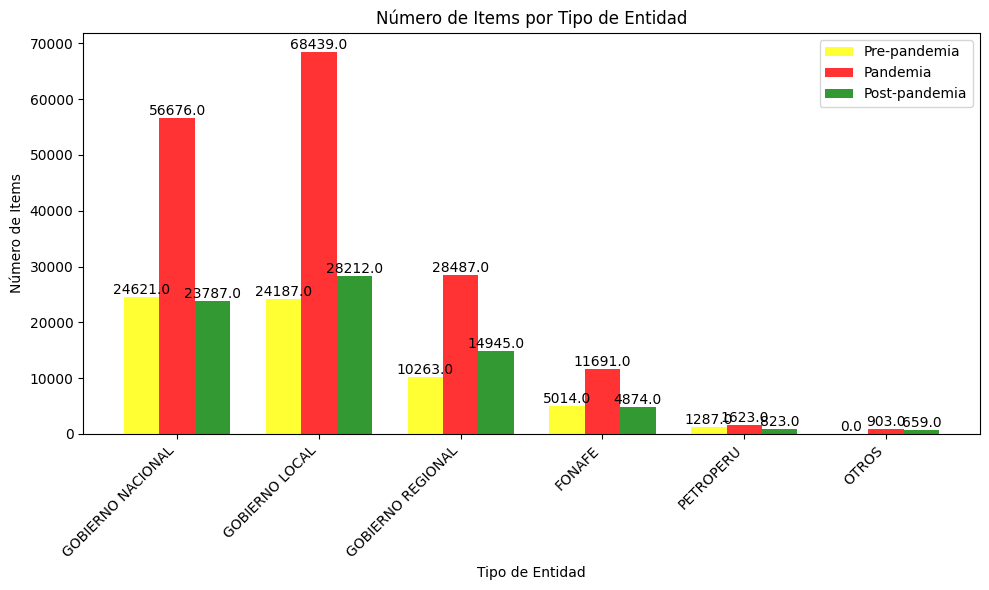

In [34]:
pre_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pre_pandemia']
pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pandemia']
post_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'post_pandemia']

pre_pandemia_counts = pre_pandemia['TIPOENTIDAD'].value_counts()
pandemia_counts = pandemia['TIPOENTIDAD'].value_counts()
post_pandemia_counts = post_pandemia['TIPOENTIDAD'].value_counts()


merged_counts = pd.concat([pre_pandemia_counts, pandemia_counts, post_pandemia_counts], axis=1, keys=['Pre-pandemia', 'Pandemia', 'Post-pandemia']).fillna(0)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(merged_counts))

# Asignar colores más claros a cada barra
light_colors = [mcolors.to_rgba(color, alpha=0.8) for color in ['yellow', 'red', 'green']]

plt.bar(index, merged_counts['Pre-pandemia'], bar_width, label='Pre-pandemia', color=light_colors[0])
plt.bar([i + bar_width for i in index], merged_counts['Pandemia'], bar_width, label='Pandemia', color=light_colors[1])
plt.bar([i + 2 * bar_width for i in index], merged_counts['Post-pandemia'], bar_width, label='Post-pandemia', color=light_colors[2])

for i, counts in enumerate(merged_counts.values):
    for j, count in enumerate(counts):
        plt.text(i + (j * bar_width), count + 0.5, str(count), ha='center', va='bottom')


plt.title('Número de Items por Tipo de Entidad')
plt.xlabel('Tipo de Entidad')
plt.ylabel('Número de Items')
plt.xticks([i + bar_width for i in index], merged_counts.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [35]:
convocatorias_o = convocatorias.groupby('OBJETOCONTRACTUAL').agg({'idx':'count'}).reset_index()
convocatorias_o = convocatorias_o.rename(columns={'idx':'total'})
convocatorias_o

,OBJETOCONTRACTUAL,total
0,Bien,154742
1,Consultoría de Obra,19792
2,Obra,28463
3,Servicio,103494


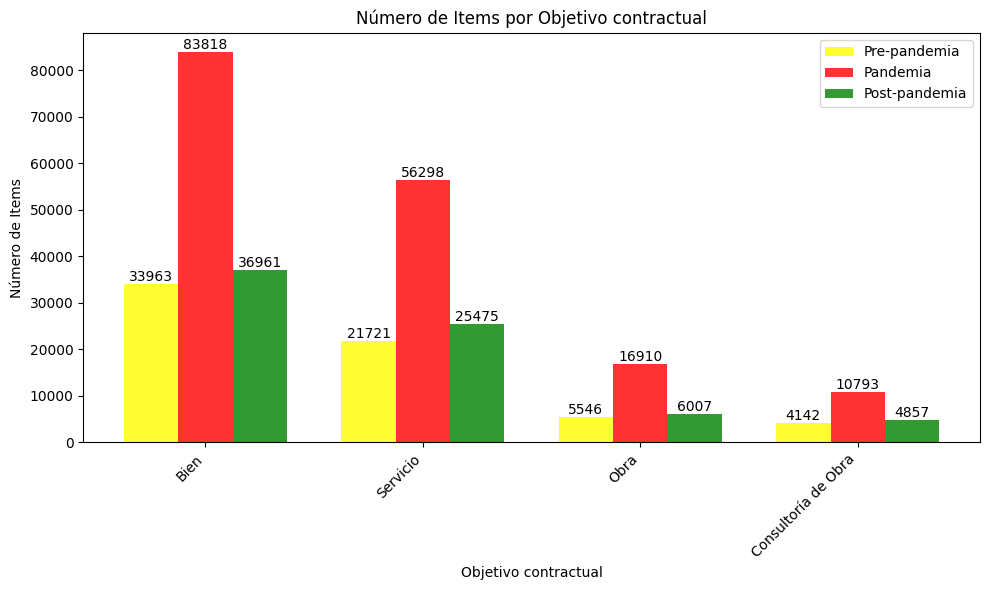

In [36]:
pre_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pre_pandemia']
pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pandemia']
post_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'post_pandemia']

pre_pandemia_counts = pre_pandemia['OBJETOCONTRACTUAL'].value_counts()
pandemia_counts = pandemia['OBJETOCONTRACTUAL'].value_counts()
post_pandemia_counts = post_pandemia['OBJETOCONTRACTUAL'].value_counts()



merged_counts = pd.concat([pre_pandemia_counts, pandemia_counts, post_pandemia_counts], axis=1, keys=['Pre-pandemia', 'Pandemia', 'Post-pandemia']).fillna(0)
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(merged_counts))

light_colors = [mcolors.to_rgba(color, alpha=0.8) for color in ['yellow', 'red', 'green']]

plt.bar(index, merged_counts['Pre-pandemia'], bar_width, label='Pre-pandemia', color=light_colors[0])
plt.bar([i + bar_width for i in index], merged_counts['Pandemia'], bar_width, label='Pandemia', color=light_colors[1])
plt.bar([i + 2 * bar_width for i in index], merged_counts['Post-pandemia'], bar_width, label='Post-pandemia', color=light_colors[2])

for i, counts in enumerate(merged_counts.values):
    for j, count in enumerate(counts):
        plt.text(i + (j * bar_width), count + 0.5, str(count), ha='center', va='bottom')


plt.title('Número de Items por Objetivo contractual')
plt.xlabel('Objetivo contractual')
plt.ylabel('Número de Items')
plt.xticks([i + bar_width for i in index], merged_counts.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [37]:
convocatorias_tp = convocatorias.groupby('TIPO_COMPRA').agg({'idx':'count'}).reset_index()
convocatorias_tp = convocatorias_tp.rename(columns={'idx':'total'})
convocatorias_tp

,TIPO_COMPRA,total
0,Compra Corporativa Facultativa,1749
1,Por encargo a Entidad Pública,463
2,Por la Entidad,304279


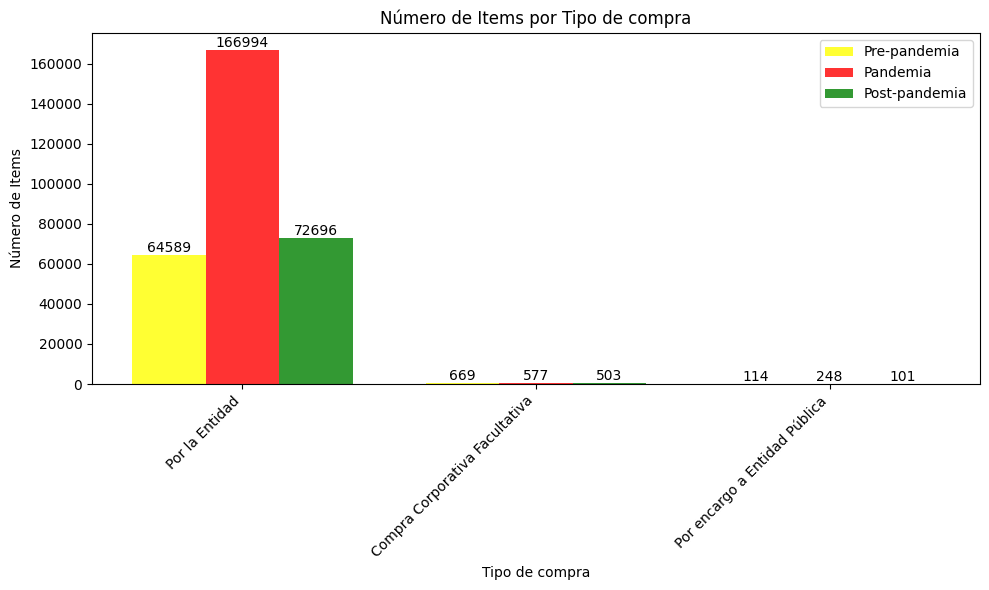

In [38]:
pre_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pre_pandemia']
pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pandemia']
post_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'post_pandemia']

# Obtener los recuentos de cada tipo de entidad para cada período
pre_pandemia_counts = pre_pandemia['TIPO_COMPRA'].value_counts()
pandemia_counts = pandemia['TIPO_COMPRA'].value_counts()
post_pandemia_counts = post_pandemia['TIPO_COMPRA'].value_counts()

merged_counts = pd.concat([pre_pandemia_counts, pandemia_counts, post_pandemia_counts], axis=1, keys=['Pre-pandemia', 'Pandemia', 'Post-pandemia']).fillna(0)
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(merged_counts))

light_colors = [mcolors.to_rgba(color, alpha=0.8) for color in ['yellow', 'red', 'green']]

plt.bar(index, merged_counts['Pre-pandemia'], bar_width, label='Pre-pandemia', color=light_colors[0])
plt.bar([i + bar_width for i in index], merged_counts['Pandemia'], bar_width, label='Pandemia', color=light_colors[1])
plt.bar([i + 2 * bar_width for i in index], merged_counts['Post-pandemia'], bar_width, label='Post-pandemia', color=light_colors[2])

for i, counts in enumerate(merged_counts.values):
    for j, count in enumerate(counts):
        plt.text(i + (j * bar_width), count + 0.5, str(count), ha='center', va='bottom')

plt.title('Número de Items por Tipo de compra')
plt.xlabel('Tipo de compra')
plt.ylabel('Número de Items')
plt.xticks([i + bar_width for i in index], merged_counts.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()




In [39]:
convocatorias_sc = convocatorias.groupby('SECTOR').agg({'idx':'count'}).reset_index()
convocatorias_sc = convocatorias_sc.rename(columns={'idx':'total'})
convocatorias_sc

,SECTOR,total
0,AGRICULTURA,5657
1,AMBIENTE,5589
2,COMERCIO EXTERIOR Y TURISMO,4016
3,CULTURA,2643
4,DEFENSA,17815
5,DESARROLLO E INCLUSION SOCIAL,1001
6,ECONOMÍA Y FINANZAS,4604
7,EDUCACIÓN,14539
8,ENERGÍA Y MINAS,7572
9,GOBIERNO LOCAL,120768


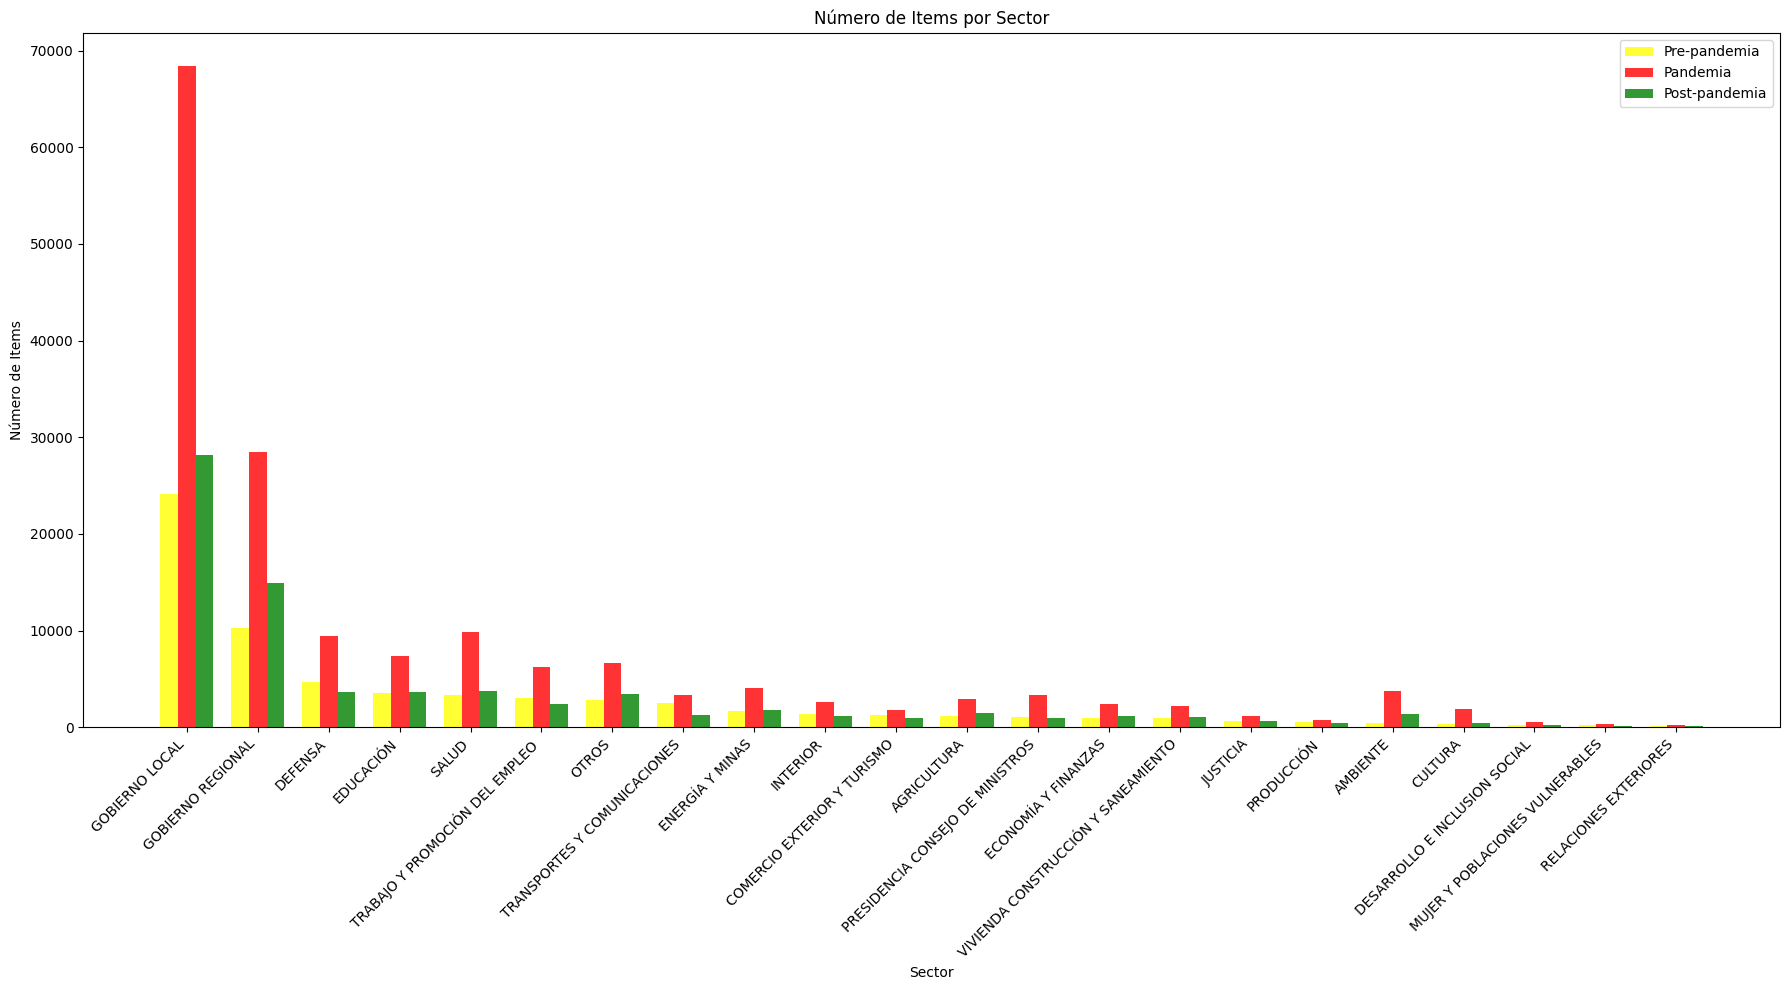

In [40]:
pre_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pre_pandemia']
pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pandemia']
post_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'post_pandemia']

# Obtener los recuentos de cada tipo de entidad para cada período
pre_pandemia_counts = pre_pandemia['SECTOR'].value_counts()
pandemia_counts = pandemia['SECTOR'].value_counts()
post_pandemia_counts = post_pandemia['SECTOR'].value_counts()

merged_counts = pd.concat([pre_pandemia_counts, pandemia_counts, post_pandemia_counts], axis=1, keys=['Pre-pandemia', 'Pandemia', 'Post-pandemia']).fillna(0)
plt.figure(figsize=(18, 10))
bar_width = 0.25
index = range(len(merged_counts))

light_colors = [mcolors.to_rgba(color, alpha=0.8) for color in ['yellow', 'red', 'green']]

plt.bar(index, merged_counts['Pre-pandemia'], bar_width, label='Pre-pandemia', color=light_colors[0])
plt.bar([i + bar_width for i in index], merged_counts['Pandemia'], bar_width, label='Pandemia', color=light_colors[1])
plt.bar([i + 2 * bar_width for i in index], merged_counts['Post-pandemia'], bar_width, label='Post-pandemia', color=light_colors[2])

# for i, counts in enumerate(merged_counts.values):
#     for j, count in enumerate(counts):
#         plt.text(i + (j * bar_width), count + 0.5, str(count), ha='center', va='bottom')

plt.title('Número de Items por Sector')
plt.xlabel('Sector')
plt.ylabel('Número de Items')
plt.xticks([i + bar_width for i in index], merged_counts.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [41]:
convocatorias_tc = convocatorias.groupby('SISTEMA_CONTRATACION').agg({'idx':'count'}).reset_index()
convocatorias_tc = convocatorias_tc.rename(columns={'idx':'total'})
convocatorias_tc

,SISTEMA_CONTRATACION,total
0,Esquema mixto,3703
1,Honorario fijo y com. éxito,112
2,Porcentajes,66
3,Precios unitarios,63688
4,"Precios unitarios, tarifas o porcentajes",4892
5,Suma alzada,229706
6,Tarifas,4282


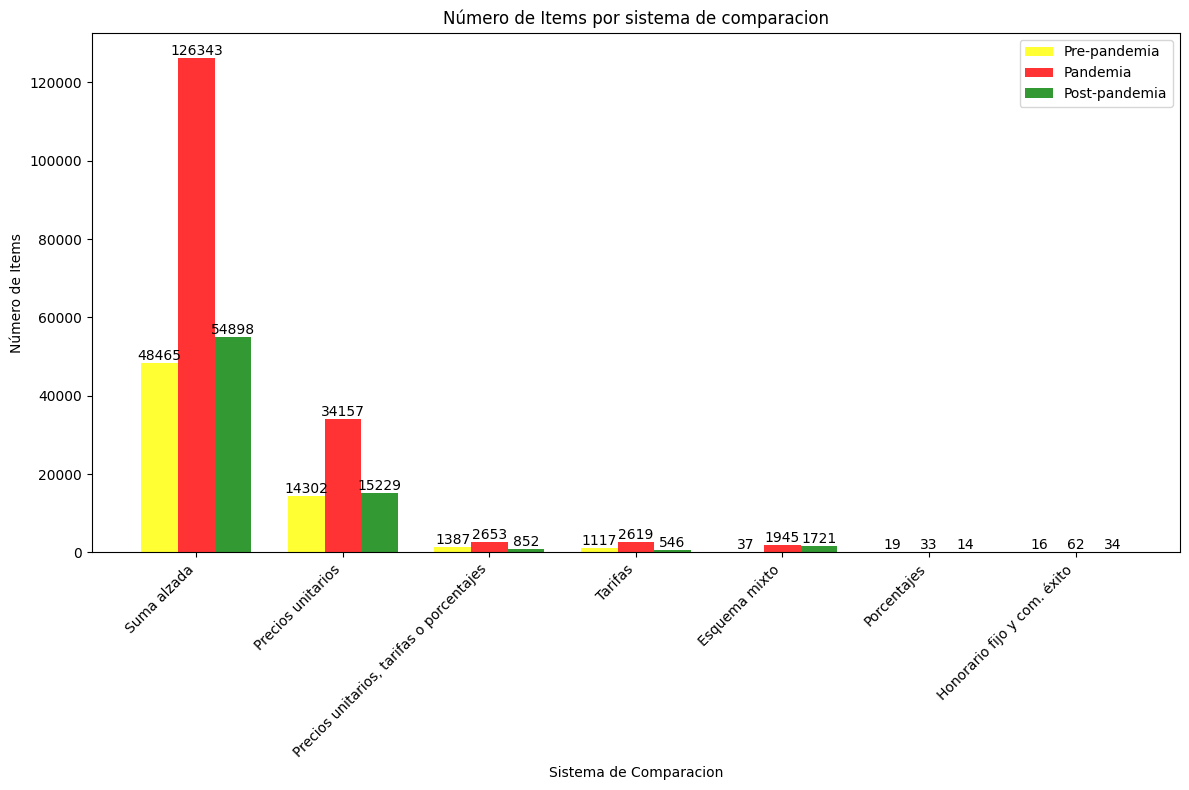

In [42]:


pre_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pre_pandemia']
pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pandemia']
post_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'post_pandemia']

# Obtener los recuentos de cada tipo de entidad para cada período
pre_pandemia_counts = pre_pandemia['SISTEMA_CONTRATACION'].value_counts()
pandemia_counts = pandemia['SISTEMA_CONTRATACION'].value_counts()
post_pandemia_counts = post_pandemia['SISTEMA_CONTRATACION'].value_counts()

merged_counts = pd.concat([pre_pandemia_counts, pandemia_counts, post_pandemia_counts], axis=1, keys=['Pre-pandemia', 'Pandemia', 'Post-pandemia']).fillna(0)
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = range(len(merged_counts))

light_colors = [mcolors.to_rgba(color, alpha=0.8) for color in ['yellow', 'red', 'green']]

plt.bar(index, merged_counts['Pre-pandemia'], bar_width, label='Pre-pandemia', color=light_colors[0])
plt.bar([i + bar_width for i in index], merged_counts['Pandemia'], bar_width, label='Pandemia', color=light_colors[1])
plt.bar([i + 2 * bar_width for i in index], merged_counts['Post-pandemia'], bar_width, label='Post-pandemia', color=light_colors[2])

for i, counts in enumerate(merged_counts.values):
    for j, count in enumerate(counts):
        plt.text(i + (j * bar_width), count + 0.5, str(count), ha='center', va='bottom')

plt.title('Número de Items por sistema de comparacion')
plt.xlabel('Sistema de Comparacion')
plt.ylabel('Número de Items')
plt.xticks([i + bar_width for i in index], merged_counts.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()




In [43]:
convocatorias_ts = convocatorias.groupby('TIPOPROCESOSELECCION').agg({'idx':'count'}).reset_index()
convocatorias_ts = convocatorias_ts.rename(columns={'idx':'total'})
convocatorias_ts

,TIPOPROCESOSELECCION,total
0,Adjudicación Abreviada,1602
1,Adjudicación Selectiva,2072
2,Adjudicación Simplificada,139748
3,Adjudicación Simplificada - Decreto Urgencia 0...,9
4,Adjudicación Simplificada - Decreto Urgencia 0...,509
5,Adjudicación Simplificada - Decreto Urgencia 0...,23
6,Adjudicación Simplificada - Décima Disposición...,5
7,Adjudicación Simplificada - Ley N° 31125,165
8,Adjudicación Simplificada - Ley N° 31589,1
9,Adjudicación Simplificada - Ley N° 31728,512


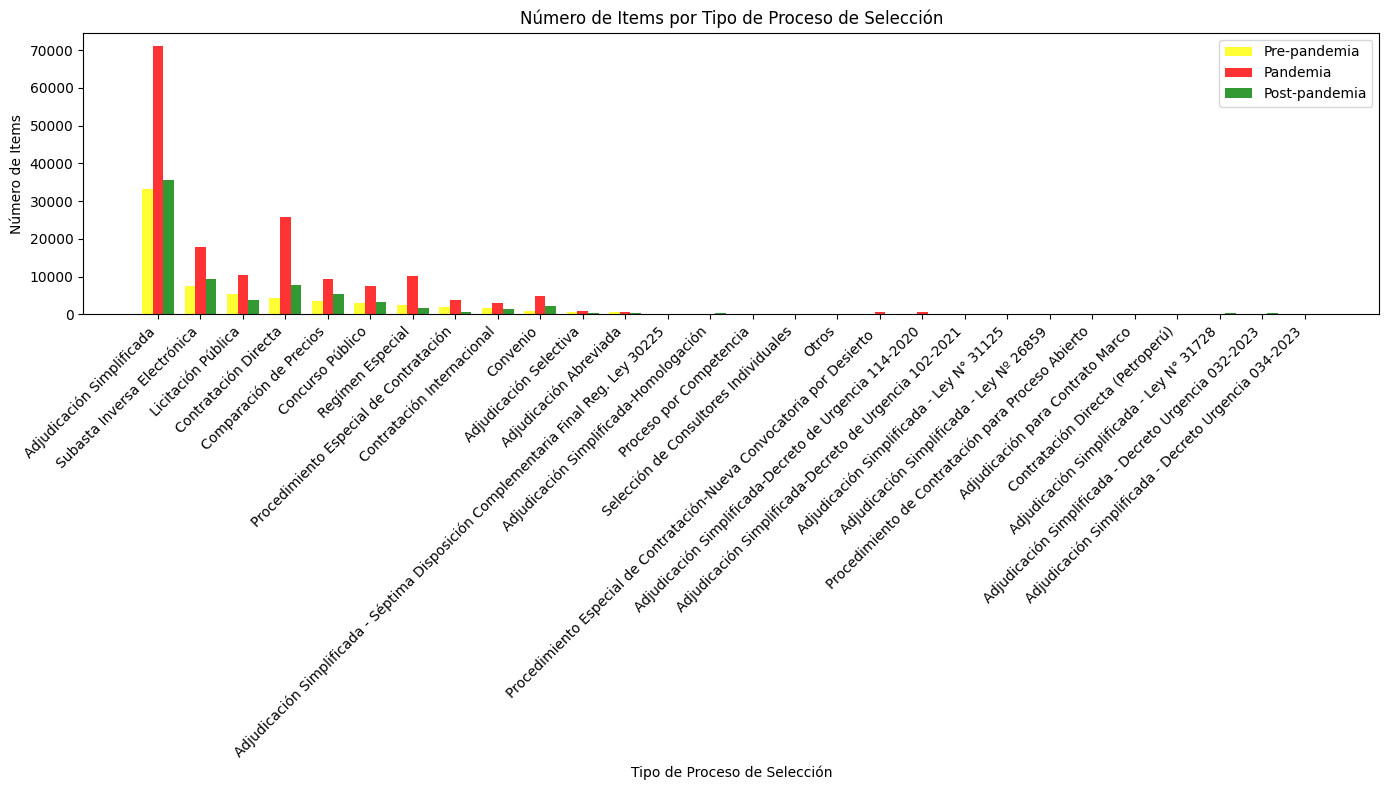

In [44]:

pre_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pre_pandemia']
pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'pandemia']
post_pandemia = convocatorias[convocatorias['FASE_PANDEMIA'] == 'post_pandemia']

pre_pandemia_counts = pre_pandemia['TIPOPROCESOSELECCION'].value_counts()
pandemia_counts = pandemia['TIPOPROCESOSELECCION'].value_counts()
post_pandemia_counts = post_pandemia['TIPOPROCESOSELECCION'].value_counts()

threshold = 10
pre_pandemia_counts_others = pre_pandemia_counts[pre_pandemia_counts < threshold].sum()
pandemia_counts_others = pandemia_counts[pandemia_counts < threshold].sum()
post_pandemia_counts_others = post_pandemia_counts[post_pandemia_counts < threshold].sum()

pre_pandemia_counts_filtered = pre_pandemia_counts[pre_pandemia_counts >= threshold]
pandemia_counts_filtered = pandemia_counts[pandemia_counts >= threshold]
post_pandemia_counts_filtered = post_pandemia_counts[post_pandemia_counts >= threshold]

# Agregar la categoría "Otros"
pre_pandemia_counts_filtered['Otros'] = pre_pandemia_counts_others
pandemia_counts_filtered['Otros'] = pandemia_counts_others
post_pandemia_counts_filtered['Otros'] = post_pandemia_counts_others

merged_counts = pd.concat([pre_pandemia_counts_filtered, pandemia_counts_filtered, post_pandemia_counts_filtered], axis=1, keys=['Pre-pandemia', 'Pandemia', 'Post-pandemia']).fillna(0)

plt.figure(figsize=(14, 8))
bar_width = 0.25
index = range(len(merged_counts))

light_colors = [mcolors.to_rgba(color, alpha=0.8) for color in ['yellow', 'red', 'green']]

plt.bar(index, merged_counts['Pre-pandemia'], bar_width, label='Pre-pandemia', color=light_colors[0])
plt.bar([i + bar_width for i in index], merged_counts['Pandemia'], bar_width, label='Pandemia', color=light_colors[1])
plt.bar([i + 2 * bar_width for i in index], merged_counts['Post-pandemia'], bar_width, label='Post-pandemia', color=light_colors[2])


# for i, counts in enumerate(merged_counts.values):
#     for j, count in enumerate(counts):
#         plt.text(i + (j * bar_width), count + 0.5, str(count), ha='center', va='bottom')

plt.title('Número de Items por Tipo de Proceso de Selección')
plt.xlabel('Tipo de Proceso de Selección')
plt.ylabel('Número de Items')
plt.xticks([i + bar_width for i in index], merged_counts.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Analisis grafico de montos referenciales

In [45]:
convocatorias_monto_referencial_tipo_entidad = convocatorias.groupby('TIPOENTIDAD').agg({'MONTOREFERENCIAL':'sum'}).reset_index()
convocatorias_monto_referencial_tipo_entidad

,TIPOENTIDAD,MONTOREFERENCIAL
0,FONAFE,2.091308e+11
1,GOBIERNO LOCAL,9.105288e+10
2,GOBIERNO NACIONAL,4.385968e+11
3,GOBIERNO REGIONAL,5.338029e+10
4,OTROS,1.162711e+09
5,PETROPERU,2.159618e+08


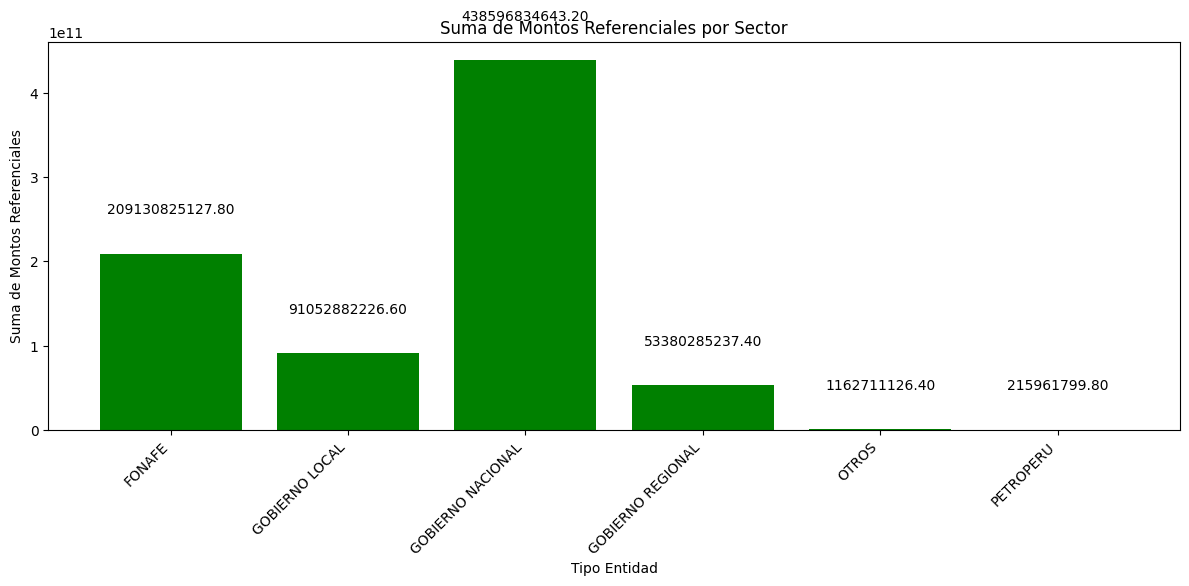

In [46]:
sectores = convocatorias_monto_referencial_tipo_entidad['TIPOENTIDAD']
sumas_montos = convocatorias_monto_referencial_tipo_entidad['MONTOREFERENCIAL']

plt.figure(figsize=(12, 6))
bars = plt.bar(sectores, sumas_montos, color='green')

plt.xlabel('Tipo Entidad')
plt.ylabel('Suma de Montos Referenciales')
plt.title('Suma de Montos Referenciales por Sector')
plt.xticks(rotation=45, ha='right')  

# Agregar los valores encima de cada barra
for bar, value in zip(bars, sumas_montos):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.1 * max(sumas_montos), 
             f'{value:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [47]:
convocatorias_monto_referencial_objeto_contractual = convocatorias.groupby('OBJETOCONTRACTUAL').agg({'MONTOREFERENCIAL':'sum'}).reset_index()
convocatorias_monto_referencial_objeto_contractual

,OBJETOCONTRACTUAL,MONTOREFERENCIAL
0,Bien,4.788707e+11
1,Consultoría de Obra,7.307009e+09
2,Obra,1.116761e+11
3,Servicio,1.956857e+11


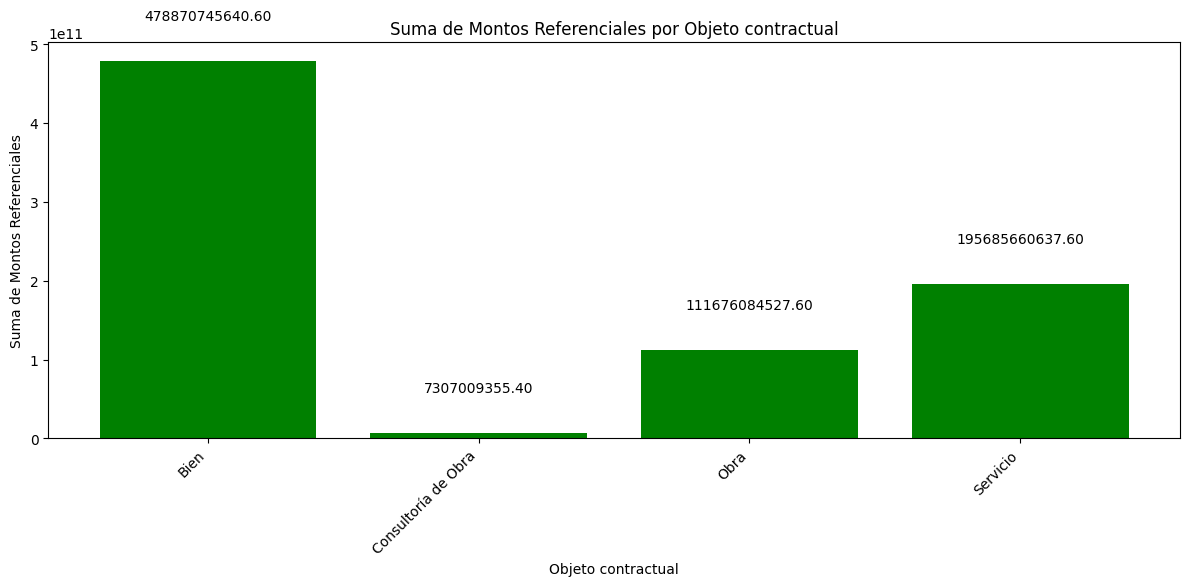

In [48]:
sectores = convocatorias_monto_referencial_objeto_contractual['OBJETOCONTRACTUAL']
sumas_montos = convocatorias_monto_referencial_objeto_contractual['MONTOREFERENCIAL']

plt.figure(figsize=(12, 6))
bars = plt.bar(sectores, sumas_montos, color='green')

plt.xlabel('Objeto contractual')
plt.ylabel('Suma de Montos Referenciales')
plt.title('Suma de Montos Referenciales por Objeto contractual')
plt.xticks(rotation=45, ha='right')  

# Agregar los valores encima de cada barra
for bar, value in zip(bars, sumas_montos):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.1 * max(sumas_montos), 
             f'{value:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [49]:
convocatorias_monto_referencial_tipo_compra = convocatorias.groupby('TIPO_COMPRA').agg({'MONTOREFERENCIAL':'sum'}).reset_index()
convocatorias_monto_referencial_tipo_compra

,TIPO_COMPRA,MONTOREFERENCIAL
0,Compra Corporativa Facultativa,2.368739e+11
1,Por encargo a Entidad Pública,1.307332e+09
2,Por la Entidad,5.553583e+11


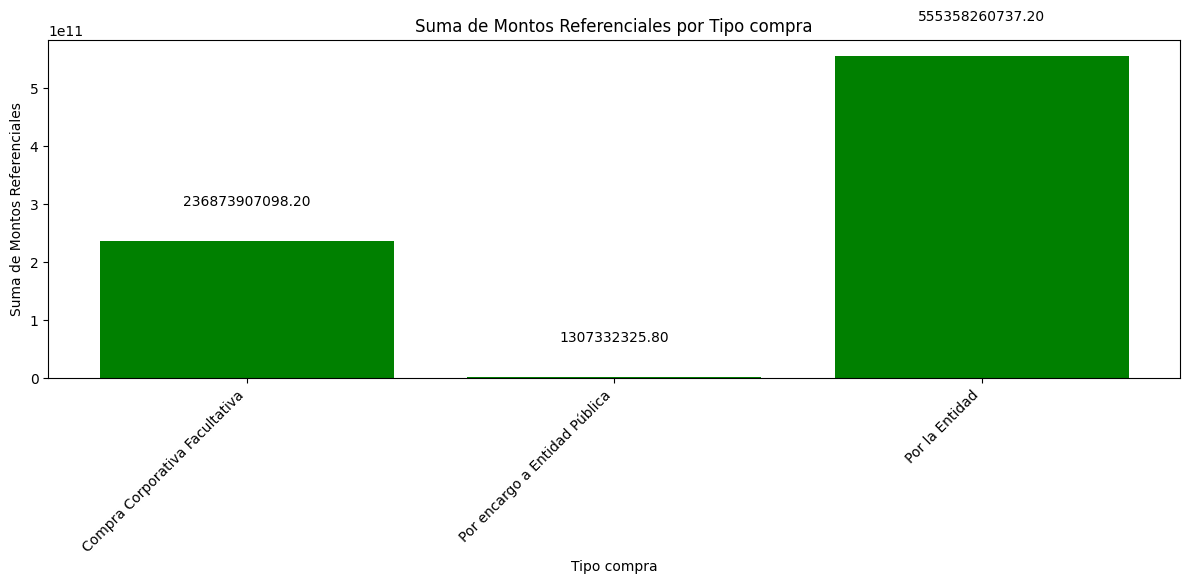

In [50]:
sectores = convocatorias_monto_referencial_tipo_compra['TIPO_COMPRA']
sumas_montos = convocatorias_monto_referencial_tipo_compra['MONTOREFERENCIAL']

plt.figure(figsize=(12, 6))
bars = plt.bar(sectores, sumas_montos, color='green')

plt.xlabel('Tipo compra')
plt.ylabel('Suma de Montos Referenciales')
plt.title('Suma de Montos Referenciales por Tipo compra')
plt.xticks(rotation=45, ha='right')  

# Agregar los valores encima de cada barra
for bar, value in zip(bars, sumas_montos):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.1 * max(sumas_montos), 
             f'{value:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [51]:
convocatorias_monto_referencial_sector = convocatorias.groupby('SECTOR').agg({'MONTOREFERENCIAL':'sum'}).reset_index()
convocatorias_monto_referencial_sector

,SECTOR,MONTOREFERENCIAL
0,AGRICULTURA,5.028526e+09
1,AMBIENTE,3.990315e+09
2,COMERCIO EXTERIOR Y TURISMO,3.220749e+09
3,CULTURA,9.419017e+09
4,DEFENSA,1.814728e+10
5,DESARROLLO E INCLUSION SOCIAL,1.278889e+09
6,ECONOMÍA Y FINANZAS,1.771991e+10
7,EDUCACIÓN,3.124220e+10
8,ENERGÍA Y MINAS,1.397192e+10
9,GOBIERNO LOCAL,9.105399e+10


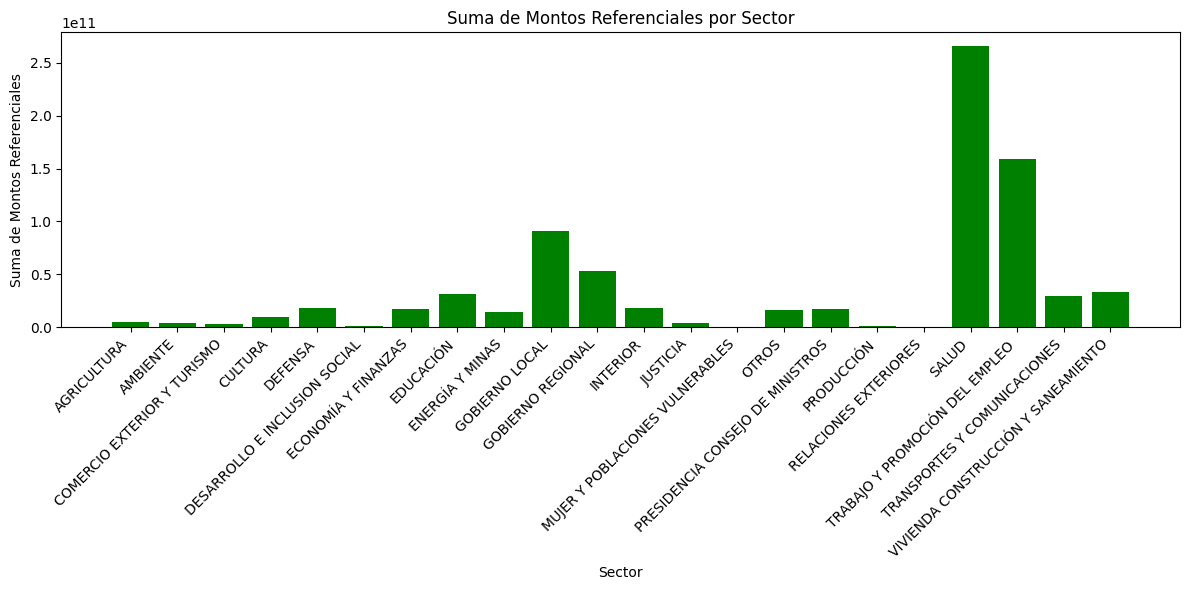

In [52]:
sectores = convocatorias_monto_referencial_sector['SECTOR']
sumas_montos = convocatorias_monto_referencial_sector['MONTOREFERENCIAL']

plt.figure(figsize=(12, 6))
bars = plt.bar(sectores, sumas_montos, color='green')

plt.xlabel('Sector')
plt.ylabel('Suma de Montos Referenciales')
plt.title('Suma de Montos Referenciales por Sector')
plt.xticks(rotation=45, ha='right')  



plt.tight_layout()
plt.show()


In [53]:
convocatorias_monto_referencial_sistema_contratacion= convocatorias.groupby('SISTEMA_CONTRATACION').agg({'MONTOREFERENCIAL':'sum'}).reset_index()
convocatorias_monto_referencial_sistema_contratacion

,SISTEMA_CONTRATACION,MONTOREFERENCIAL
0,Esquema mixto,1.291859e+10
1,Honorario fijo y com. éxito,7.167614e+07
2,Porcentajes,4.633738e+07
3,Precios unitarios,2.427730e+11
4,"Precios unitarios, tarifas o porcentajes",8.401968e+09
5,Suma alzada,5.276981e+11
6,Tarifas,1.578952e+09


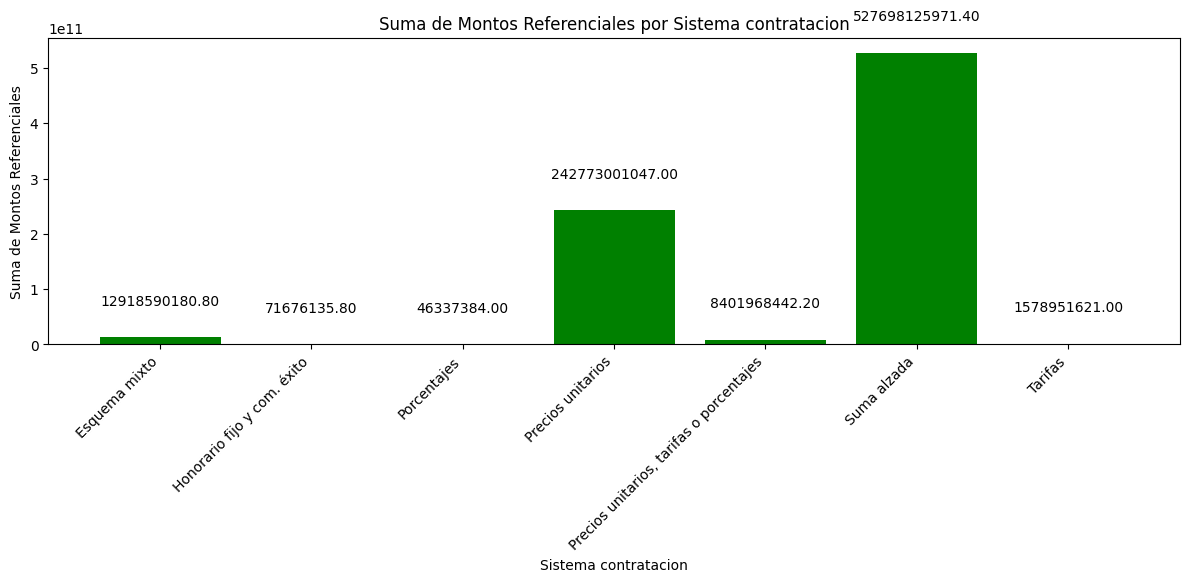

In [54]:
sectores = convocatorias_monto_referencial_sistema_contratacion['SISTEMA_CONTRATACION']
sumas_montos = convocatorias_monto_referencial_sistema_contratacion['MONTOREFERENCIAL']

plt.figure(figsize=(12, 6))
bars = plt.bar(sectores, sumas_montos, color='green')

plt.xlabel('Sistema contratacion')
plt.ylabel('Suma de Montos Referenciales')
plt.title('Suma de Montos Referenciales por Sistema contratacion')
plt.xticks(rotation=45, ha='right')  

# Agregar los valores encima de cada barra
for bar, value in zip(bars, sumas_montos):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.1 * max(sumas_montos), 
             f'{value:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [55]:
convocatorias_monto_referencial_tipo_proceso= convocatorias.groupby('TIPOPROCESOSELECCION').agg({'MONTOREFERENCIAL':'sum'}).reset_index()
convocatorias_monto_referencial_tipo_proceso

,TIPOPROCESOSELECCION,MONTOREFERENCIAL
0,Adjudicación Abreviada,1.117858e+08
1,Adjudicación Selectiva,3.027623e+07
2,Adjudicación Simplificada,6.729476e+10
3,Adjudicación Simplificada - Decreto Urgencia 0...,1.366558e+08
4,Adjudicación Simplificada - Decreto Urgencia 0...,3.591066e+09
5,Adjudicación Simplificada - Decreto Urgencia 0...,5.260155e+07
6,Adjudicación Simplificada - Décima Disposición...,6.935159e+06
7,Adjudicación Simplificada - Ley N° 31125,8.287456e+08
8,Adjudicación Simplificada - Ley N° 31589,1.236692e+06
9,Adjudicación Simplificada - Ley N° 31728,2.746361e+09


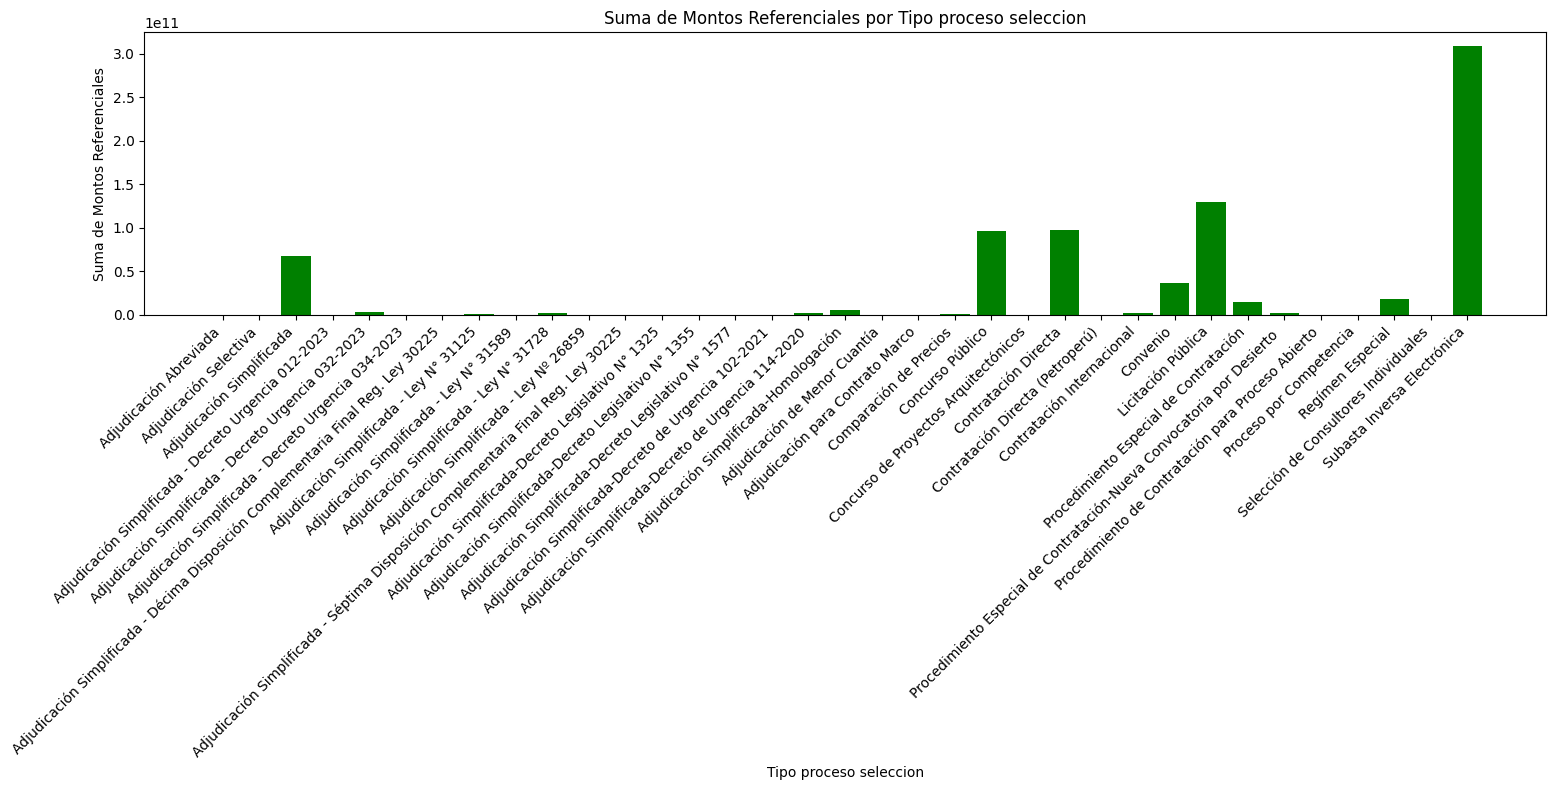

In [56]:
sectores = convocatorias_monto_referencial_tipo_proceso['TIPOPROCESOSELECCION']
sumas_montos = convocatorias_monto_referencial_tipo_proceso['MONTOREFERENCIAL']

plt.figure(figsize=(16, 8))
bars = plt.bar(sectores, sumas_montos, color='green')

plt.xlabel('Tipo proceso seleccion')
plt.ylabel('Suma de Montos Referenciales')
plt.title('Suma de Montos Referenciales por Tipo proceso seleccion')
plt.xticks(rotation=45, ha='right')  


plt.tight_layout()
plt.show()


### Analisis variables numericas

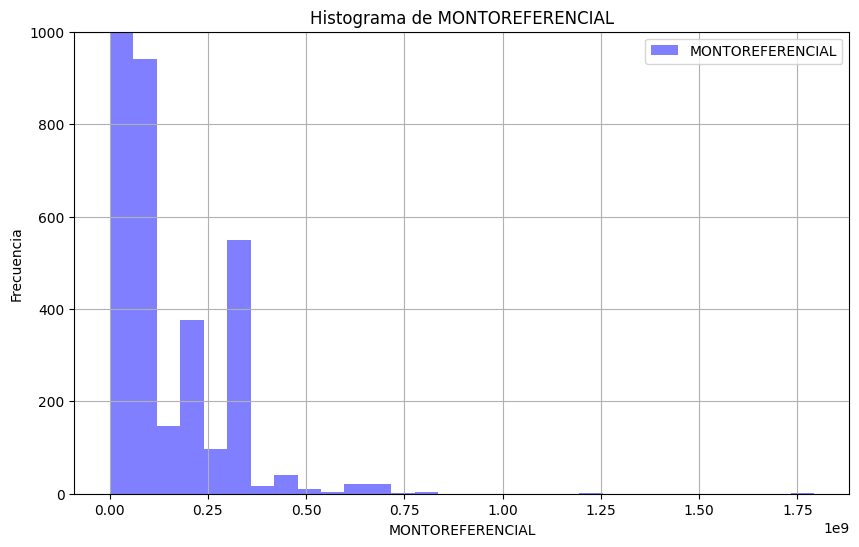

In [57]:
num_bins = 30

plt.figure(figsize=(10, 6))
plt.hist(convocatorias['MONTOREFERENCIAL'], bins=num_bins, alpha=0.5, color='blue', label='MONTOREFERENCIAL')
plt.xlabel('MONTOREFERENCIAL')
plt.ylabel('Frecuencia')
plt.title('Histograma de MONTOREFERENCIAL')
plt.legend()
plt.grid(True)

plt.ylim(0, 1000)  

plt.show()


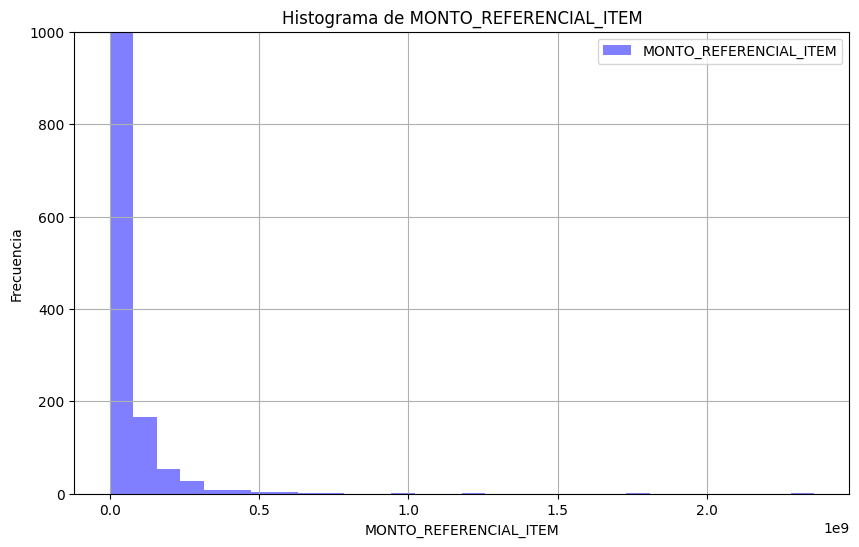

In [58]:
num_bins = 30

plt.figure(figsize=(10, 6))
plt.hist(convocatorias['MONTO_REFERENCIAL_ITEM'], bins=num_bins, alpha=0.5, color='blue', label='MONTO_REFERENCIAL_ITEM')
plt.xlabel('MONTO_REFERENCIAL_ITEM')
plt.ylabel('Frecuencia')
plt.title('Histograma de MONTO_REFERENCIAL_ITEM')
plt.legend()
plt.grid(True)

plt.ylim(0, 1000)  

plt.show()


In [59]:
data_numeric = convocatorias.select_dtypes(include=[np.number])

description = data_numeric.describe()

percentil_25 = description.loc['25%']
percentil_75 = description.loc['75%']

iqr = percentil_75 - percentil_25

description.loc['IQR'] = iqr

description

descriptivos_filtrado = description[['MONTO_REFERENCIAL_ITEM', 'MONTOREFERENCIAL']]

descriptivos_filtrado

,MONTO_REFERENCIAL_ITEM,MONTOREFERENCIAL
count,3.064910e+05,3.064910e+05
mean,8.673003e+05,2.589112e+06
std,8.980899e+06,2.095637e+07
min,0.000000e+00,0.000000e+00
25%,6.854400e+04,7.679700e+04
50%,1.396100e+05,1.839000e+05
75%,3.631305e+05,5.536900e+05
max,2.359424e+09,1.792432e+09
IQR,2.945865e+05,4.768930e+05


In [60]:
descriptivos_filtrado.to_csv(ruta_out + 'convocatorias_descriptivos.csv')

## Postores

In [61]:
postores_2019 = pd.read_excel(ruta_in + '2. CONOSCE_POSTOR2019_0.xlsx')
postores_2020 = pd.read_excel(ruta_in + '2. CONOSCE_POSTOR2020_0703.xlsx')
postores_2021 = pd.read_excel(ruta_in + '2. CONOSCE_POSTOR2021_0.xlsx')
postores_2022 = pd.read_excel(ruta_in + '2. CONOSCE_POSTOR2022_0.xlsx')
postores_2023 = pd.read_excel(ruta_in + '2. CONOSCE_POSTOR2023_0.xlsx')

In [62]:
postores_2019.columns.values

array(['CODIGO_CONVOCATORIA', 'FECHACONVOCATORIA', 'N_ITEM',
       'RUC_CODIGO_POSTOR', 'POSTOR', 'FECHA_PRESENTACION_PROPUESTA'],
      dtype=object)

In [63]:
postores_2020.columns.values

array(['CODIGO_CONVOCATORIA', 'FECHACONVOCATORIA', 'N_ITEM',
       'RUC_CODIGO_POSTOR', 'POSTOR', 'FECHA_PRESENTACION_PROPUESTA'],
      dtype=object)

In [64]:
postores_2021.columns.values

array(['CODIGO_CONVOCATORIA', 'FECHACONVOCATORIA', 'N_ITEM',
       'RUC_CODIGO_POSTOR', 'POSTOR', 'FECHA_PRESENTACION_PROPUESTA'],
      dtype=object)

In [65]:
postores_2022.columns.values

array(['CODIGO_CONVOCATORIA', 'FECHACONVOCATORIA', 'N_ITEM',
       'RUC_CODIGO_POSTOR', 'POSTOR', 'FECHA_PRESENTACION_PROPUESTA'],
      dtype=object)

In [66]:
postores_2022.columns.values

array(['CODIGO_CONVOCATORIA', 'FECHACONVOCATORIA', 'N_ITEM',
       'RUC_CODIGO_POSTOR', 'POSTOR', 'FECHA_PRESENTACION_PROPUESTA'],
      dtype=object)

In [67]:
postores = pd.concat([postores_2019, postores_2020, postores_2021, postores_2022, postores_2023])
del([postores_2019, postores_2020, postores_2021, postores_2022, postores_2023])

In [68]:
postores['idx'] = postores['CODIGO_CONVOCATORIA'].astype(str).str.cat(postores['N_ITEM'].astype(str), sep='-')
postores = postores.rename(columns={'CODIGO_CONVOCATORIA':'CODIGOCONVOCATORIA'})

In [69]:
postores.shape

(858155, 7)

In [70]:
postores.head(2)

,CODIGOCONVOCATORIA,FECHACONVOCATORIA,N_ITEM,RUC_CODIGO_POSTOR,POSTOR,FECHA_PRESENTACION_PROPUESTA,idx
0,590290,2019-12-20 05:00:00,1,20449282729,EMPRESA DE SERVICIOS MULTIPLES J.M. INGENIEROS...,2020-01-06,590290-1
1,568453,2019-10-14 05:00:00,1,20506281084,FIRE TECHNOLOGY S.A.C.,2019-10-24,568453-1


In [71]:
arr_pos = ['idx', 'RUC_CODIGO_POSTOR', 'POSTOR']
postores_ = postores[arr_pos]

#### Entenimiento caso unico

In [72]:
cod_post_590290c = convocatorias[convocatorias['CODIGOCONVOCATORIA'] == 751001]
cod_post_590290c.shape


(27, 30)

In [73]:
cod_post_590290p = postores[postores['CODIGOCONVOCATORIA'] == 751001]
cod_post_590290p.shape

(66, 7)

In [74]:
cod_post_590290p = postores[arr_pos]
cod_post_590290p.shape

(858155, 3)

In [75]:
data_hub_p = cod_post_590290c.merge(cod_post_590290p,how='left', on=['idx'])

In [76]:
data_hub_p.shape

(66, 32)

## Data Hub (PARTE 1)

In [77]:
data_hub_1 = convocatorias.merge(postores_,how='left', on=['idx'])

In [78]:
postores_.shape

(858155, 3)

In [79]:
data_hub_1.shape

(885268, 32)

In [80]:
data_hub_1.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA', 'FASE_PANDEMIA', 'idx',
       'RUC_CODIGO_POSTOR', 'POSTOR'], dtype=object)

## Adjudicados

In [133]:
adjudicados_2019 = pd.read_excel(ruta_in + '3. CONOSCE_ADJUDICACIONES2019_0.xlsx')
adjudicados_2020 = pd.read_excel(ruta_in + '3. CONOSCE_ADJUDICACIONES2020_0703.xlsx')
adjudicados_2021 = pd.read_excel(ruta_in + '3. CONOSCE_ADJUDICACIONES2021_0.xlsx')
adjudicados_2022 = pd.read_excel(ruta_in + '3. CONOSCE_ADJUDICACIONES2022_0.xlsx')
adjudicados_2023 = pd.read_excel(ruta_in + '3. CONOSCE_ADJUDICACIONES2023_0.xlsx')

In [134]:
adjudicados_2019.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'CODIGOCONVOCATORIA', 'PROCESO',
       'N_ITEM', 'DESCRIPCION_ITEM', 'ESTADO_ITEM',
       'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONTO_ADJUDICADO_ITEM', 'MONEDA', 'UNIDAD_MEDIDA',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR',
       'FECHA_CONVOCATORIA', 'FECHA_BUENAPRO', 'FECHA_CONSENTIMIENTO_BP'],
      dtype=object)

In [135]:
adjudicados_2020.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'CODIGOCONVOCATORIA', 'PROCESO',
       'N_ITEM', 'DESCRIPCION_ITEM', 'ESTADO_ITEM',
       'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONTO_ADJUDICADO_ITEM', 'MONEDA', 'UNIDAD_MEDIDA',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR',
       'FECHA_CONVOCATORIA', 'FECHA_BUENAPRO', 'FECHA_CONSENTIMIENTO_BP'],
      dtype=object)

In [136]:
adjudicados_2021.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'CODIGOCONVOCATORIA', 'PROCESO',
       'N_ITEM', 'DESCRIPCION_ITEM', 'ESTADO_ITEM',
       'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONTO_ADJUDICADO_ITEM', 'MONEDA', 'UNIDAD_MEDIDA',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR',
       'FECHA_CONVOCATORIA', 'FECHA_BUENAPRO', 'FECHA_CONSENTIMIENTO_BP'],
      dtype=object)

In [137]:
adjudicados_2022.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'CODIGOCONVOCATORIA', 'PROCESO',
       'N_ITEM', 'DESCRIPCION_ITEM', 'ESTADO_ITEM',
       'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONTO_ADJUDICADO_ITEM', 'MONEDA', 'UNIDAD_MEDIDA',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR',
       'FECHA_CONVOCATORIA', 'FECHA_BUENAPRO', 'FECHA_CONSENTIMIENTO_BP'],
      dtype=object)

In [138]:
adjudicados_2023.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'CODIGOCONVOCATORIA', 'PROCESO',
       'N_ITEM', 'DESCRIPCION_ITEM', 'ESTADO_ITEM',
       'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONTO_ADJUDICADO_ITEM', 'MONEDA', 'UNIDAD_MEDIDA',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR',
       'FECHA_CONVOCATORIA', 'FECHA_BUENAPRO', 'FECHA_CONSENTIMIENTO_BP'],
      dtype=object)

In [139]:
adjudicados = pd.concat([adjudicados_2019, adjudicados_2020, adjudicados_2021, adjudicados_2022, adjudicados_2023])
del([adjudicados_2019, adjudicados_2020, adjudicados_2021, adjudicados_2022, adjudicados_2023])

In [140]:
adjudicados['idx'] = adjudicados['CODIGOCONVOCATORIA'].astype(str).str.cat(adjudicados['N_ITEM'].astype(str), sep='-')

In [141]:
adjudicados.tail(2)

,CODIGOENTIDAD,ENTIDAD_RUC,CODIGOCONVOCATORIA,PROCESO,N_ITEM,DESCRIPCION_ITEM,ESTADO_ITEM,CANTIDAD_ADJUDICADO_ITEM,MONTO_REFERENCIAL_ITEM,MONTO_ADJUDICADO_ITEM,MONEDA,UNIDAD_MEDIDA,RUC_PROVEEDOR,PROVEEDOR,TIPO_PROVEEDOR,FECHA_CONVOCATORIA,FECHA_BUENAPRO,FECHA_CONSENTIMIENTO_BP,idx
61781,200175,20452726999,968494,COMPRE-SM-3-2023-RSI-1,1,MICROSCOPIO BINOCULAR Y OCULAR DE 10 X PARA FL...,Contratado,3.0,64215.0,64215.0,Soles,Unidad,20600853059,DROGUERIA DISTRIBUIDORA CENTA PHARMA S.A.C. - ...,Persona Juridica,2023-12-04,2023-12-05,2023-12-14,968494-1
61782,2381,20102762925,984321,DIRECTA-PROC-3-2023-EPS GRAU SA-GG-1,1,"MEDIDORES DE 1/2"" DE DIAMETRO INCLUIDO ACCESOR...",Contratado,3200.0,868480.0,868480.0,Soles,Unidad,1489223,CONSORCIO GRAU MEDIDORES,Consorcio,2023-12-30,2023-12-30,1900-01-01,984321-1


In [142]:
adjudicados['flag_adjudicado'] = 1

In [143]:
arr_adj = ['idx','CANTIDAD_ADJUDICADO_ITEM', 'MONTO_ADJUDICADO_ITEM', 
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR',
       'FECHA_BUENAPRO', 'FECHA_CONSENTIMIENTO_BP', 'flag_adjudicado',
       ]
adjudicados_ = adjudicados[arr_adj]

In [144]:
adjudicados.shape

(308124, 20)

#### Entendimiendo caso unico

In [145]:
cod_adj_590290a = adjudicados[adjudicados['CODIGOCONVOCATORIA'] == 751001]
cod_adj_590290a = cod_adj_590290a[arr_adj]

cod_adj_590290a.shape

(27, 9)

In [146]:
data_hub_a = data_hub_p.merge(cod_adj_590290a,how='left', on=['idx'])
data_hub_a = data_hub_a.groupby('idx').first().reset_index()
data_hub_a['flag_adjudicado'] = data_hub_a['flag_adjudicado'].fillna(0).astype(int)

In [147]:
data_hub_p.shape

(66, 32)

In [148]:
data_hub_a_ = data_hub_a[data_hub_a['CODIGOCONVOCATORIA'] == 751001]
data_hub_a_.shape

(27, 40)

## Data Hub (PARTE 2)

In [149]:
data_hub_ = data_hub_1.merge(adjudicados_,how='left', on=['idx'])
data_hub_ = data_hub_.groupby('idx').first().reset_index()
# data_hub_['flag_adjudicado'] = data_hub_a['flag_adjudicado'].fillna(0).astype(int)

In [150]:
data_hub_.shape

(306491, 40)

In [151]:
data_hub_.columns.values

array(['idx', 'CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA', 'FASE_PANDEMIA', 'RUC_CODIGO_POSTOR',
       'POSTOR', 'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_ADJUDICADO_ITEM',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR', 'FECHA_BUENAPRO',
       'FECHA_CONSENTIMIENTO_BP', 'flag_adjudicado'], dtype=object)

## Contratos

In [152]:
contratos_2019 = pd.read_excel(ruta_in + '5. CONOSCE_CONTRATOS2019_0.xlsx')
contratos_2020 = pd.read_excel(ruta_in + '5. CONOSCE_CONTRATOS2020_0703.xlsx')
contratos_2021 = pd.read_excel(ruta_in + '5. CONOSCE_CONTRATOS2021_0.xlsx')
contratos_2022 = pd.read_excel(ruta_in + '5. CONOSCE_CONTRATOS2022_0.xlsx')
contratos_2023 = pd.read_excel(ruta_in + '5. CONOSCE_CONTRATOS2023_0.xlsx')

In [153]:
contratos_2019.columns.values

array(['CODIGOCONVOCATORIA', 'N_COD_CONTRATO', 'DESCRIPCION_PROCESO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO',
       'NUM_CONTRATO', 'MONTO_CONTRATADO_TOTAL', 'MONTO_CONTRATADO_ITEM',
       'MONTO_ADICIONAL', 'MONTO_REDUCCION', 'MONTO_PRORROGA',
       'MONTO_COMPLEMENTARIO', 'URLCONTRATO', 'CODIGOENTIDAD', 'NUM_ITEM',
       'MONEDA', 'RUC_CONTRATISTA', 'RUC_DESTINATARIO_PAGO',
       'TIENERESOLUCION'], dtype=object)

In [154]:
contratos_2020.columns.values

array(['CODIGOCONVOCATORIA', 'N_COD_CONTRATO', 'DESCRIPCION_PROCESO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO',
       'NUM_CONTRATO', 'MONTO_CONTRATADO_TOTAL', 'MONTO_CONTRATADO_ITEM',
       'MONTO_ADICIONAL', 'MONTO_REDUCCION', 'MONTO_PRORROGA',
       'MONTO_COMPLEMENTARIO', 'URLCONTRATO', 'CODIGOENTIDAD', 'NUM_ITEM',
       'MONEDA', 'RUC_CONTRATISTA', 'RUC_DESTINATARIO_PAGO',
       'TIENERESOLUCION'], dtype=object)

In [155]:
contratos_2021.columns.values

array(['CODIGOCONVOCATORIA', 'N_COD_CONTRATO', 'DESCRIPCION_PROCESO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO',
       'NUM_CONTRATO', 'MONTO_CONTRATADO_TOTAL', 'MONTO_CONTRATADO_ITEM',
       'MONTO_ADICIONAL', 'MONTO_REDUCCION', 'MONTO_PRORROGA',
       'MONTO_COMPLEMENTARIO', 'URLCONTRATO', 'CODIGOENTIDAD', 'NUM_ITEM',
       'MONEDA', 'RUC_CONTRATISTA', 'RUC_DESTINATARIO_PAGO',
       'TIENERESOLUCION'], dtype=object)

In [156]:
contratos_2022.columns.values

array(['CODIGOCONVOCATORIA', 'N_COD_CONTRATO', 'DESCRIPCION_PROCESO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO',
       'NUM_CONTRATO', 'MONTO_CONTRATADO_TOTAL', 'MONTO_CONTRATADO_ITEM',
       'MONTO_ADICIONAL', 'MONTO_REDUCCION', 'MONTO_PRORROGA',
       'MONTO_COMPLEMENTARIO', 'URLCONTRATO', 'CODIGOENTIDAD', 'NUM_ITEM',
       'MONEDA', 'RUC_CONTRATISTA', 'RUC_DESTINATARIO_PAGO',
       'TIENERESOLUCION'], dtype=object)

In [157]:
contratos_2023.columns.values

array(['CODIGOCONVOCATORIA', 'N_COD_CONTRATO', 'DESCRIPCION_PROCESO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO',
       'NUM_CONTRATO', 'MONTO_CONTRATADO_TOTAL', 'MONTO_CONTRATADO_ITEM',
       'MONTO_ADICIONAL', 'MONTO_REDUCCION', 'MONTO_PRORROGA',
       'MONTO_COMPLEMENTARIO', 'URLCONTRATO', 'CODIGOENTIDAD', 'NUM_ITEM',
       'MONEDA', 'RUC_CONTRATISTA', 'RUC_DESTINATARIO_PAGO',
       'TIENERESOLUCION'], dtype=object)

In [158]:
contratos = pd.concat([contratos_2019, contratos_2020, contratos_2021, contratos_2022, contratos_2023])
del([contratos_2019, contratos_2020, contratos_2021, contratos_2022, contratos_2023])

In [159]:
contratos['idx'] = contratos['CODIGOCONVOCATORIA'].astype(str).str.cat(contratos['NUM_ITEM'].astype(str), sep='-')

In [160]:
arr_con = ['idx', 'N_COD_CONTRATO', 
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO',
       'NUM_CONTRATO', 'MONTO_CONTRATADO_TOTAL', 'MONTO_CONTRATADO_ITEM',
       'MONTO_ADICIONAL', 'MONTO_REDUCCION', 'MONTO_PRORROGA',
       'MONTO_COMPLEMENTARIO', 'URLCONTRATO',
       'RUC_CONTRATISTA', 'RUC_DESTINATARIO_PAGO',
       'TIENERESOLUCION', ]

contratos_ = contratos[arr_con]

#### Entendimiento caso unico

In [161]:

cod_con_590290c = contratos[contratos['CODIGOCONVOCATORIA'] == 751001]
cod_con_590290c = cod_con_590290c[arr_con]

cod_con_590290c.shape

(27, 19)

In [162]:
data_hub_c = data_hub_a.merge(cod_con_590290c, on='idx',how='left')

In [163]:
data_hub_c.shape

(27, 58)

## Data Hub (PARTE 3)

In [164]:
data_hub_ = data_hub_.merge(contratos_, on='idx',how='left')

In [165]:
data_hub_.shape

(343420, 58)

In [166]:
data_hub_.columns.values

array(['idx', 'CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA', 'FASE_PANDEMIA', 'RUC_CODIGO_POSTOR',
       'POSTOR', 'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_ADJUDICADO_ITEM',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR', 'FECHA_BUENAPRO',
       'FECHA_CONSENTIMIENTO_BP', 'flag_adjudicado', 'N_COD_CONTRATO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO'

In [167]:
data_hub_.to_csv(ruta_out + 'data_hub_.csv', sep=';', index=False, encoding='utf-8-sig')

### Analisis de contratacion

In [168]:
data_hub_['flag_fecha_contrato'] = (data_hub_['FECHA_PUBLICACION_CONTRATO'] - data_hub_['FECHA_CONVOCATORIA']).dt.days

In [169]:
data_hub_.head(2)

,idx,CODIGOENTIDAD,ENTIDAD_RUC,ENTIDAD,TIPOENTIDAD,CODIGOCONVOCATORIA,DESCRIPCION_PROCESO,PROCESO,TIPO_COMPRA,OBJETOCONTRACTUAL,...,MONTO_CONTRATADO_ITEM,MONTO_ADICIONAL,MONTO_REDUCCION,MONTO_PRORROGA,MONTO_COMPLEMENTARIO,URLCONTRATO,RUC_CONTRATISTA,RUC_DESTINATARIO_PAGO,TIENERESOLUCION,flag_fecha_contrato
0,431034-1,2433,-1374708262,PETROLEOS DEL PERU S.A.,PETROPERU,431034,ADQUISICION DE ALIMENTOS PARA LAS COMUNIDADES ...,DIR-PROC-58-2017-OLE / PETROPERU-1,Por la Entidad,Bien,...,127704.00,NaN,NaN,NaN,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,20308877605,20308877605,NO,10.0
1,499548-1,2433,-1374708262,PETROLEOS DEL PERU S.A.,PETROPERU,499548,ADQUISICION DE REPUESTOS DE DOS AÑOS DE OPERAC...,ABR-PROC-238-2018-OFP / PETROPERU-1,Por la Entidad,Bien,...,2608090.95,0.0,0.0,0.0,0.0,http://zonasegura.seace.gob.pe/documentos/mon\...,20160479290,20160479290,NO,1.0


In [170]:
data_hub_['flag_index_corrupcion'] = (data_hub_['flag_fecha_contrato'] < 5).astype(int)

In [171]:
data_hub_.head(2)

,idx,CODIGOENTIDAD,ENTIDAD_RUC,ENTIDAD,TIPOENTIDAD,CODIGOCONVOCATORIA,DESCRIPCION_PROCESO,PROCESO,TIPO_COMPRA,OBJETOCONTRACTUAL,...,MONTO_ADICIONAL,MONTO_REDUCCION,MONTO_PRORROGA,MONTO_COMPLEMENTARIO,URLCONTRATO,RUC_CONTRATISTA,RUC_DESTINATARIO_PAGO,TIENERESOLUCION,flag_fecha_contrato,flag_index_corrupcion
0,431034-1,2433,-1374708262,PETROLEOS DEL PERU S.A.,PETROPERU,431034,ADQUISICION DE ALIMENTOS PARA LAS COMUNIDADES ...,DIR-PROC-58-2017-OLE / PETROPERU-1,Por la Entidad,Bien,...,NaN,NaN,NaN,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,20308877605,20308877605,NO,10.0,0
1,499548-1,2433,-1374708262,PETROLEOS DEL PERU S.A.,PETROPERU,499548,ADQUISICION DE REPUESTOS DE DOS AÑOS DE OPERAC...,ABR-PROC-238-2018-OFP / PETROPERU-1,Por la Entidad,Bien,...,0.0,0.0,0.0,0.0,http://zonasegura.seace.gob.pe/documentos/mon\...,20160479290,20160479290,NO,1.0,1


In [117]:
# Unir los DataFrames basados en las columnas compartidas
merged_df = pd.merge(data_hub_1, data_hub_[['RUC_CODIGO_POSTOR', 'flag_adjudicado']], on='RUC_CODIGO_POSTOR', how='left')

# Llenar los valores faltantes en la columna flag_adjudicado con 0
merged_df['flag_adjudicado'] = merged_df['flag_adjudicado'].fillna(0)

MemoryError: Unable to allocate 7.58 GiB for an array with shape (1017939355,) and data type int64

In [172]:
data_hub_1.columns.values

array(['CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA', 'FASE_PANDEMIA', 'idx',
       'RUC_CODIGO_POSTOR', 'POSTOR'], dtype=object)

In [173]:
data_hub_.columns.values

array(['idx', 'CODIGOENTIDAD', 'ENTIDAD_RUC', 'ENTIDAD', 'TIPOENTIDAD',
       'CODIGOCONVOCATORIA', 'DESCRIPCION_PROCESO', 'PROCESO',
       'TIPO_COMPRA', 'OBJETOCONTRACTUAL', 'SECTOR',
       'SISTEMA_CONTRATACION', 'TIPOPROCESOSELECCION', 'MONTOREFERENCIAL',
       'N_ITEM', 'DESCRIPCION_ITEM', 'UNIDAD_MEDIDA', 'ESTADOITEM',
       'PAQUETE', 'CODIGOITEM', 'ITEMCUBSO', 'DISTRITO_ITEM',
       'PROVINCIA_ITEM', 'DEPARTAMENTO_ITEM', 'MONTO_REFERENCIAL_ITEM',
       'MONEDA', 'FECHA_CONVOCATORIA', 'FECHAINTEGRACIONBASES',
       'FECHAPRESENTACIONPROPUESTA', 'FASE_PANDEMIA', 'RUC_CODIGO_POSTOR',
       'POSTOR', 'CANTIDAD_ADJUDICADO_ITEM', 'MONTO_ADJUDICADO_ITEM',
       'RUC_PROVEEDOR', 'PROVEEDOR', 'TIPO_PROVEEDOR', 'FECHA_BUENAPRO',
       'FECHA_CONSENTIMIENTO_BP', 'flag_adjudicado', 'N_COD_CONTRATO',
       'FECHA_PUBLICACION_CONTRATO', 'FECHA_SUSCRIPCION_CONTRATO',
       'FECHA_VIGENCIA_INICIAL', 'FECHA_VIGENCIA_FINAL',
       'FECHA_VIGENCIA_FIN_ACTUALIZADA', 'CODIGO_CONTRATO'

In [174]:
variables_comunes = set(data_hub_.columns) & set(data_hub_1.columns)
variables_comunes

{'CODIGOCONVOCATORIA',
 'CODIGOENTIDAD',
 'CODIGOITEM',
 'DEPARTAMENTO_ITEM',
 'DESCRIPCION_ITEM',
 'DESCRIPCION_PROCESO',
 'DISTRITO_ITEM',
 'ENTIDAD',
 'ENTIDAD_RUC',
 'ESTADOITEM',
 'FASE_PANDEMIA',
 'FECHAINTEGRACIONBASES',
 'FECHAPRESENTACIONPROPUESTA',
 'FECHA_CONVOCATORIA',
 'ITEMCUBSO',
 'MONEDA',
 'MONTOREFERENCIAL',
 'MONTO_REFERENCIAL_ITEM',
 'N_ITEM',
 'OBJETOCONTRACTUAL',
 'PAQUETE',
 'POSTOR',
 'PROCESO',
 'PROVINCIA_ITEM',
 'RUC_CODIGO_POSTOR',
 'SECTOR',
 'SISTEMA_CONTRATACION',
 'TIPOENTIDAD',
 'TIPOPROCESOSELECCION',
 'TIPO_COMPRA',
 'UNIDAD_MEDIDA',
 'idx'}

In [175]:
empresas_contratadas = data_hub_[data_hub_['flag_adjudicado'] == 1]
empresas_contratadas.shape

(343420, 60)

In [179]:
empresas_no_contratadas = data_hub_1[(data_hub_1['RUC_CODIGO_POSTOR'].isin(empresas_contratadas['RUC_CODIGO_POSTOR'])) & (~data_hub_1.index.isin(empresas_contratadas.index))]

In [180]:
empresas_no_contratadas.shape

(433876, 32)

In [181]:
empresas_no_contratadas['flag_adjudicado'] = 0

C:\Users\llore\AppData\Local\Temp\ipykernel_704\2188315910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_no_contratadas['flag_adjudicado'] = 0


In [182]:
empresas_no_contratadas.head()

,CODIGOENTIDAD,ENTIDAD_RUC,ENTIDAD,TIPOENTIDAD,CODIGOCONVOCATORIA,DESCRIPCION_PROCESO,PROCESO,TIPO_COMPRA,OBJETOCONTRACTUAL,SECTOR,...,MONTO_REFERENCIAL_ITEM,MONEDA,FECHA_CONVOCATORIA,FECHAINTEGRACIONBASES,FECHAPRESENTACIONPROPUESTA,FASE_PANDEMIA,idx,RUC_CODIGO_POSTOR,POSTOR,flag_adjudicado
343421,1820,-943640905,MUNICIPALIDAD DISTRITAL DE SHAMBOYACU,GOBIERNO LOCAL,608510,Contratación de Arroz Pilado Superior para la ...,DIRECTA-PROC-2-2020-MDSH/OEC-1,Por la Entidad,Bien,GOBIERNO LOCAL,...,68850.0,Soles,2020-04-15,1900-01-01 05:08:36,2020-04-14 05:00:00,pandemia,608510-1,20572204571,ASOCIACION DE PRODUCTORES AGROPECUARIOS GRANO ...,0
343422,1055,-1327132107,MUNICIPALIDAD PROVINCIAL DE PALPA,GOBIERNO LOCAL,625519,MANTENIMIENTO PERIODICO Y RUTINARIO DEL CAMINO...,RES-PROC-2-2020-CS-MPP-1,Por la Entidad,Servicio,GOBIERNO LOCAL,...,1667255.0,Soles,2020-07-20,1900-01-01 05:08:36,2020-07-21 05:00:00,pandemia,625519-1,383899,CONSORCIO TIBILLO 2ii,0
343429,1055,-1327132107,MUNICIPALIDAD PROVINCIAL DE PALPA,GOBIERNO LOCAL,625519,MANTENIMIENTO PERIODICO Y RUTINARIO DEL CAMINO...,RES-PROC-2-2020-CS-MPP-1,Por la Entidad,Servicio,GOBIERNO LOCAL,...,1667255.0,Soles,2020-07-20,1900-01-01 05:08:36,2020-07-21 05:00:00,pandemia,625519-1,20452698766,MAQUINARIAS Y TRANSPORTES DE CARGA ALARCON EIRL,0
343431,35,-1022442987,GOBIERNO REGIONAL DE AYACUCHO SEDE CENTRAL,GOBIERNO REGIONAL,614595,ADQUISICION DE MADERA TORNILLO PARA LA META 16...,AS-SM-33-2020-GRA-SEDECENTRAL-1,Por la Entidad,Bien,GOBIERNO REGIONAL,...,109176.0,Soles,2020-06-05,2020-06-11 05:00:00,2020-06-16 05:00:00,pandemia,614595-1,20604135304,SUMINISTRO DE MADERAS S.A.C.,0
343432,35,-1022442987,GOBIERNO REGIONAL DE AYACUCHO SEDE CENTRAL,GOBIERNO REGIONAL,614595,ADQUISICION DE MADERA TORNILLO PARA LA META 16...,AS-SM-33-2020-GRA-SEDECENTRAL-1,Por la Entidad,Bien,GOBIERNO REGIONAL,...,109176.0,Soles,2020-06-05,2020-06-11 05:00:00,2020-06-16 05:00:00,pandemia,614595-1,20568975422,CORFEMAD E.I.R.L.,0


In [183]:
# Unir los DataFrames basados en las columnas compartidas
merged_df = pd.merge(data_hub_, empresas_no_contratadas[['RUC_CODIGO_POSTOR', 'flag_adjudicado']], on='RUC_CODIGO_POSTOR', how='left')

# Llenar los valores faltantes en la columna flag_adjudicado con 0
# merged_df['flag_adjudicado'] = merged_df['flag_adjudicado'].fillna(0)

MemoryError: Unable to allocate 1.96 GiB for an array with shape (12, 21896492) and data type float64

In [ ]:
merged_df